# Import libraries

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Read dataset

In [7]:
data = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
data.head(3)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


# Replace some for better understanding

In [8]:
data["Marital_Status"].replace(0,"Unmarried",inplace=True)
data["Marital_Status"].replace(1,"Married",inplace=True)

In [9]:
data["Gender"].replace("F","Female",inplace=True)
data["Gender"].replace("M","Male",inplace=True)

In [10]:
data.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
8495,1000780,Ishit,P00192042,Female,26-35,28,Married,Uttar Pradesh,Central,Aviation,Clothing & Apparel,2,5420.0,NaN,NaN
4594,1001414,Luke,P00147742,Female,18-25,18,Unmarried,Kerala,Southern,IT Sector,Electronics & Gadgets,4,9729.0,NaN,NaN
11004,1003128,Donovan,P00024042,Female,18-25,23,Unmarried,Madhya Pradesh,Central,Govt,Beauty,3,1536.0,NaN,NaN
580,1005355,Akanksha,P00246142,Female,55+,90,Married,Gujarat,Western,Banking,Food,1,19505.0,NaN,NaN
10922,1000010,Nishant,P00120142,Male,36-45,39,Unmarried,Uttarakhand,Central,Govt,Beauty,3,1738.0,NaN,NaN


# Understanding dataset


In [11]:
data.shape

(11251, 15)

In [12]:
pd.isnull(data).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [13]:
# Remove Status and unnamed1 columns
data=data.drop(["unnamed1"],axis=1)
data=data.drop(["Status"],axis=1)

In [14]:
data.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


In [16]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
data.shape

(11251, 13)

In [18]:
data.describe()

,User_ID,Age,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,2.489290,9453.610858
std,1.716125e+03,12.754122,1.115047,5222.355869
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [19]:
data[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Analysis on Gender base

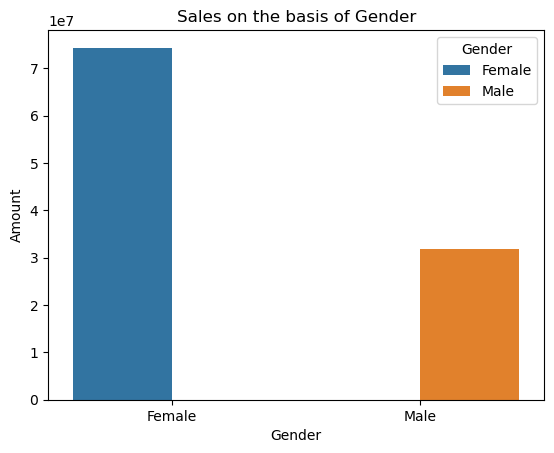

In [20]:
sales_gender = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gender, hue = 'Gender')
ax.set_title('Sales on the basis of Gender')
plt.show()


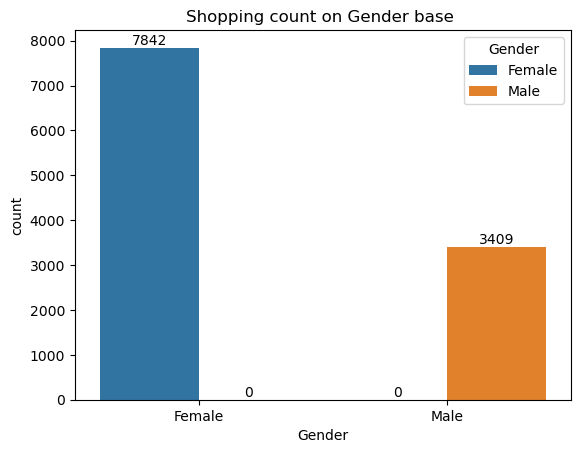

In [21]:
ax = sns.countplot(x = 'Gender',data = data, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Shopping count on Gender base ')
plt.show()

# Analysis on Age base


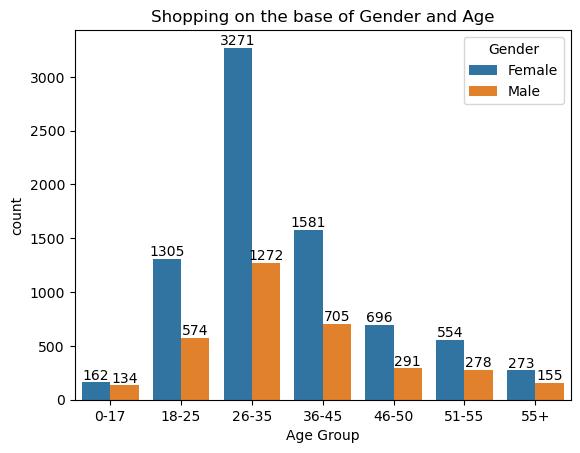

In [22]:
order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"]
ax = sns.countplot(data = data, x = 'Age Group', 
                   hue = 'Gender',order=order)

for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Shopping on the base of Gender and Age')
plt.show()

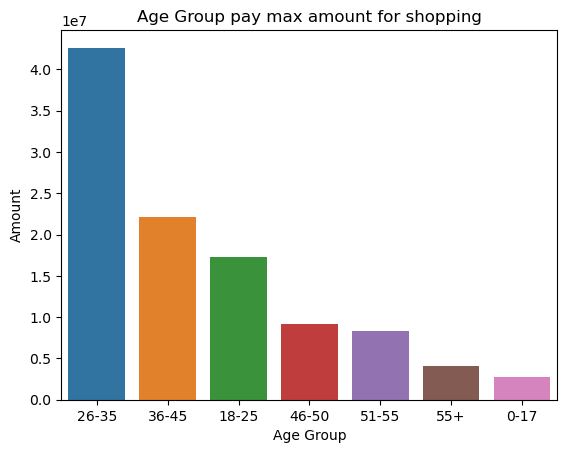

In [23]:
# Total Amount vs Age Group

sales_age = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
ax.set_title('Age Group pay max amount for shopping')
plt.show()

# Analysis on State base

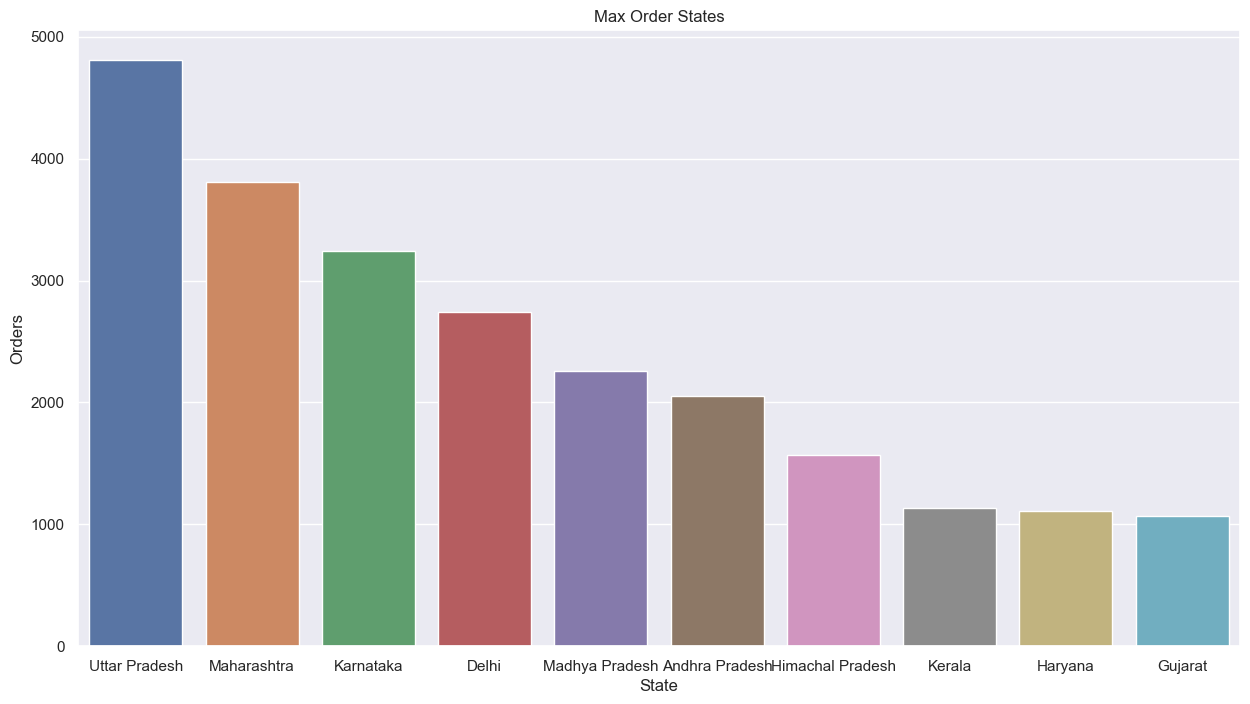

In [24]:
# total number of orders from top 10 states

sales_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,8)})
ax=sns.barplot(data = sales_state, x = 'State',y= 'Orders')
ax.set_title('Max Order States')
plt.show()

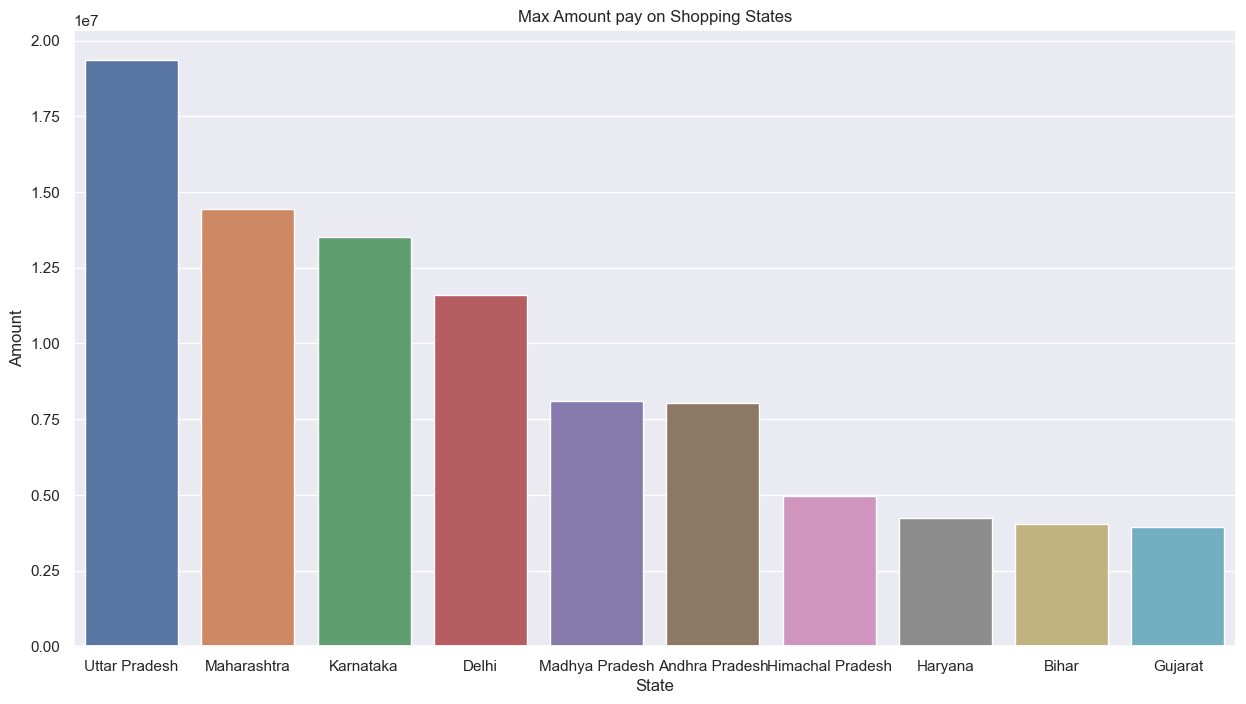

In [25]:
# total amount/sales from top 10 states

sales_state = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,8)})
ax=sns.barplot(data = sales_state, x = 'State',y= 'Amount')
ax.set_title('Max Amount pay on Shopping States')
plt.show()

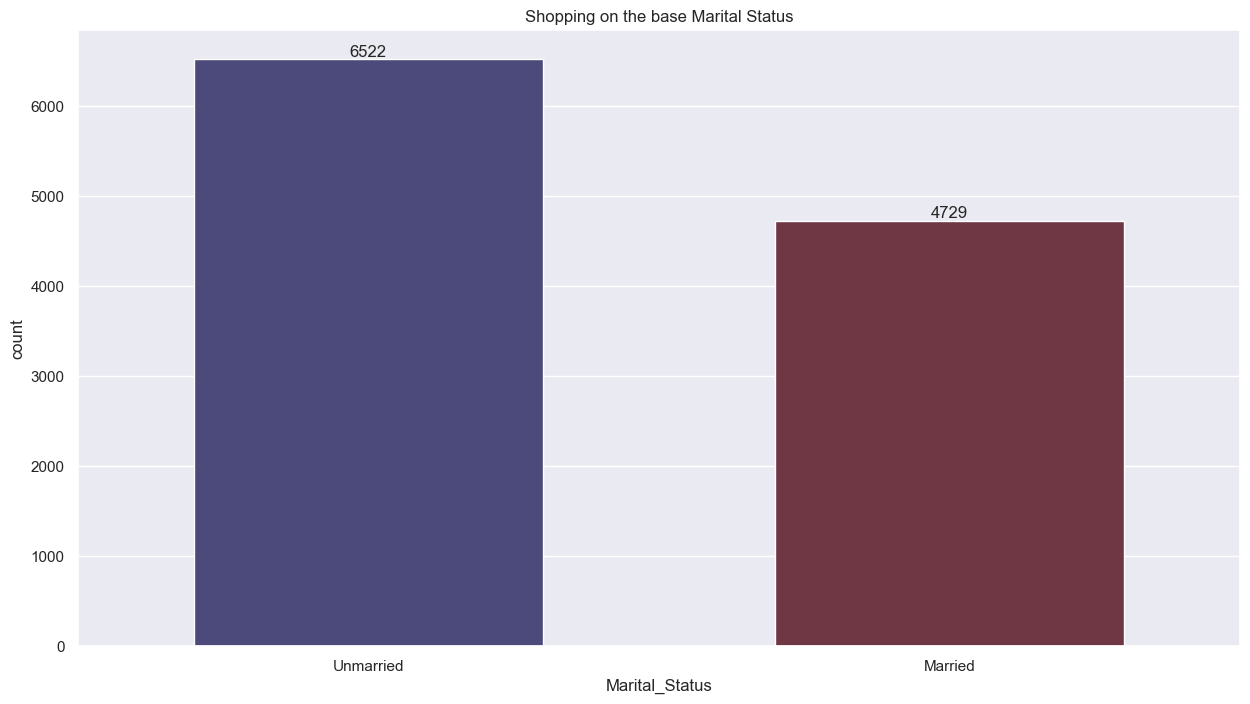

In [26]:
ax = sns.countplot(data = data, x = 'Marital_Status',palette="icefire",width=0.6)

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Shopping on the base Marital Status')
plt.show()

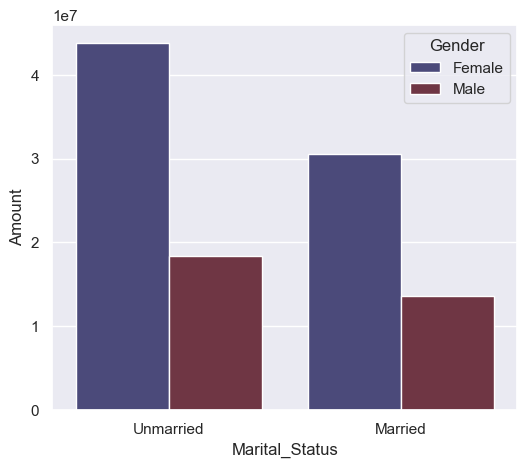

In [27]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette="icefire")
plt.show()

# Analysis on Occupation base

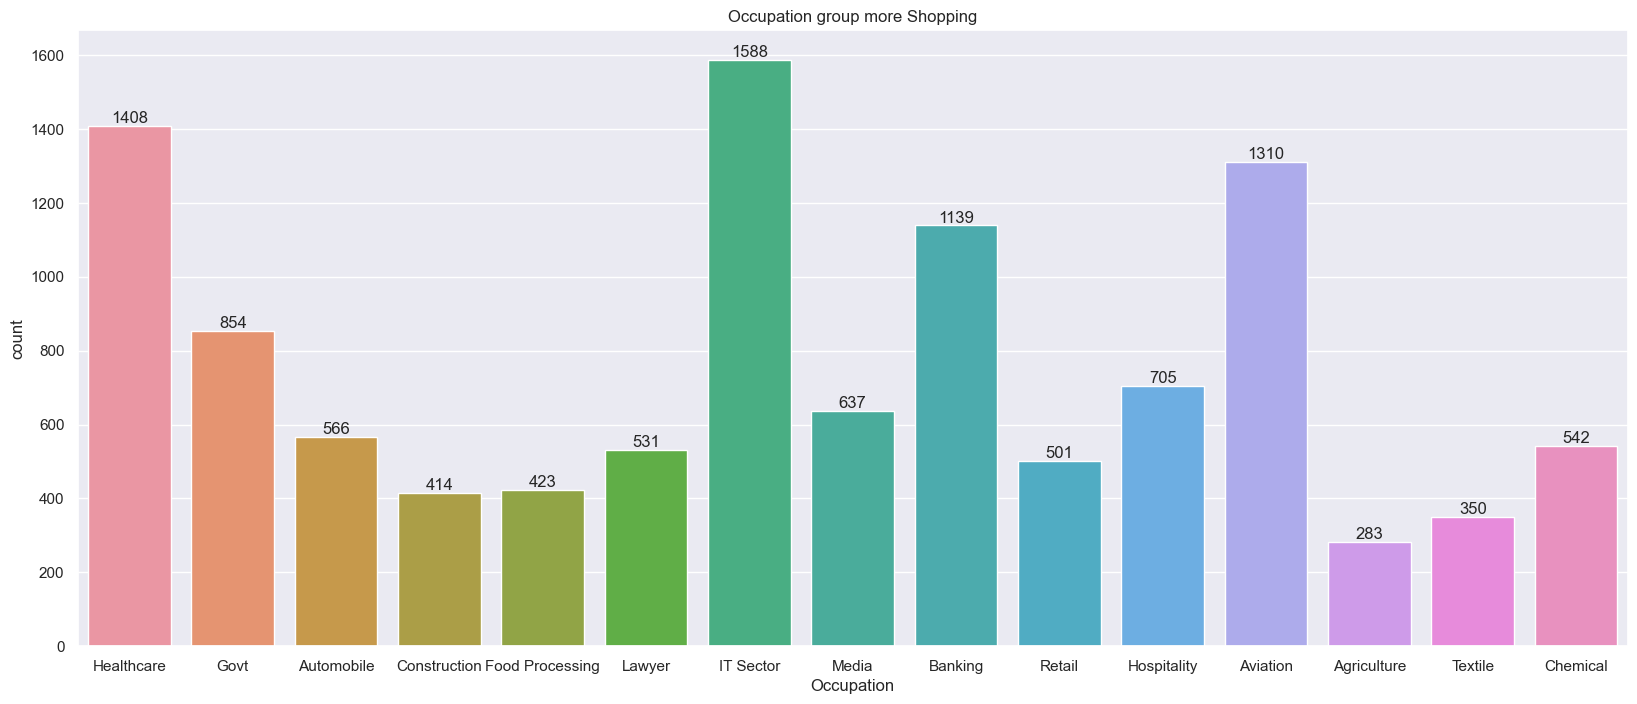

In [28]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(data = data, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Occupation group more Shopping')
plt.show()

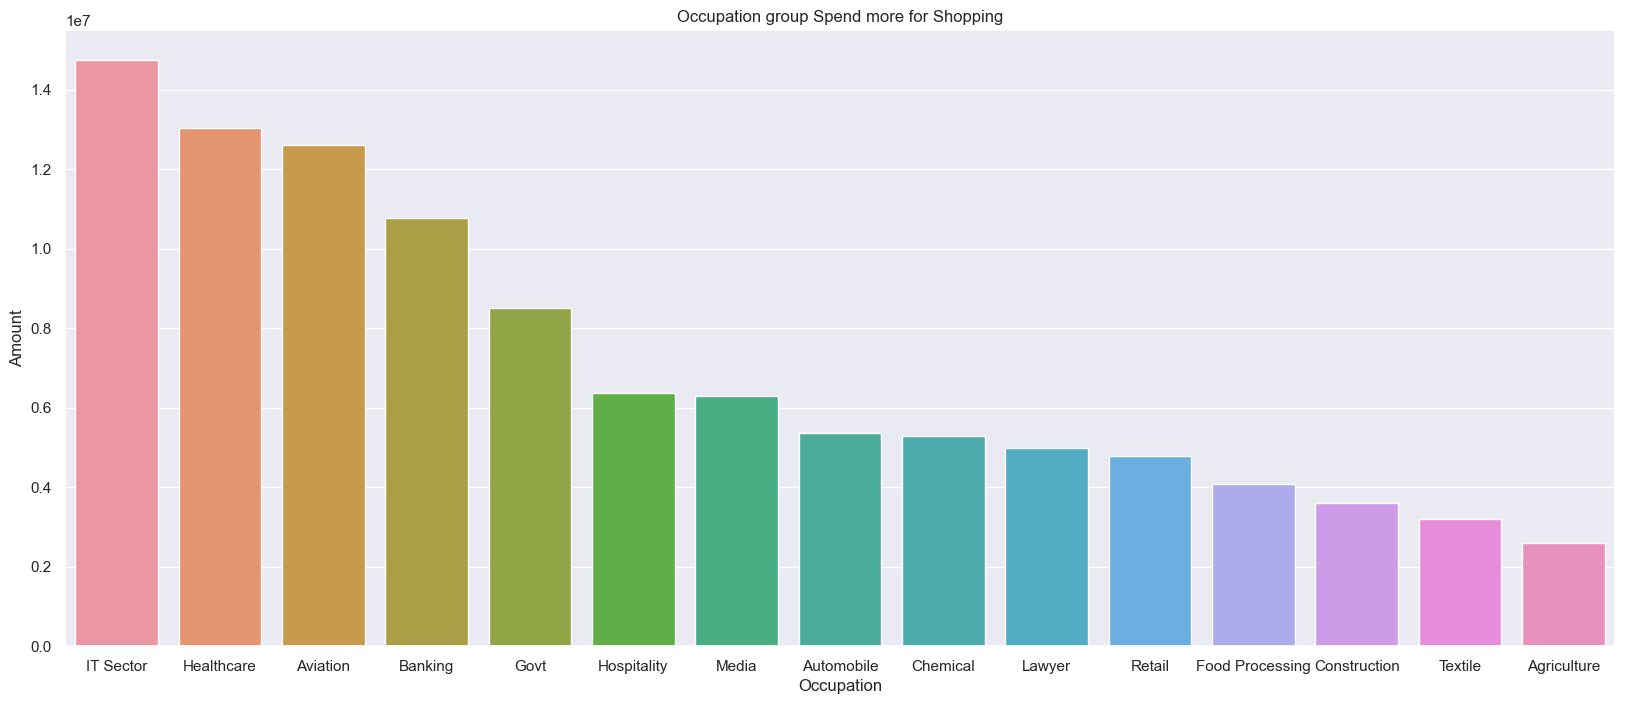

In [29]:
sales_state = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,8)})
ax=sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
ax.set_title('Occupation group Spend more for Shopping',loc ='center')
plt.show()

# Analysis on Product Category base

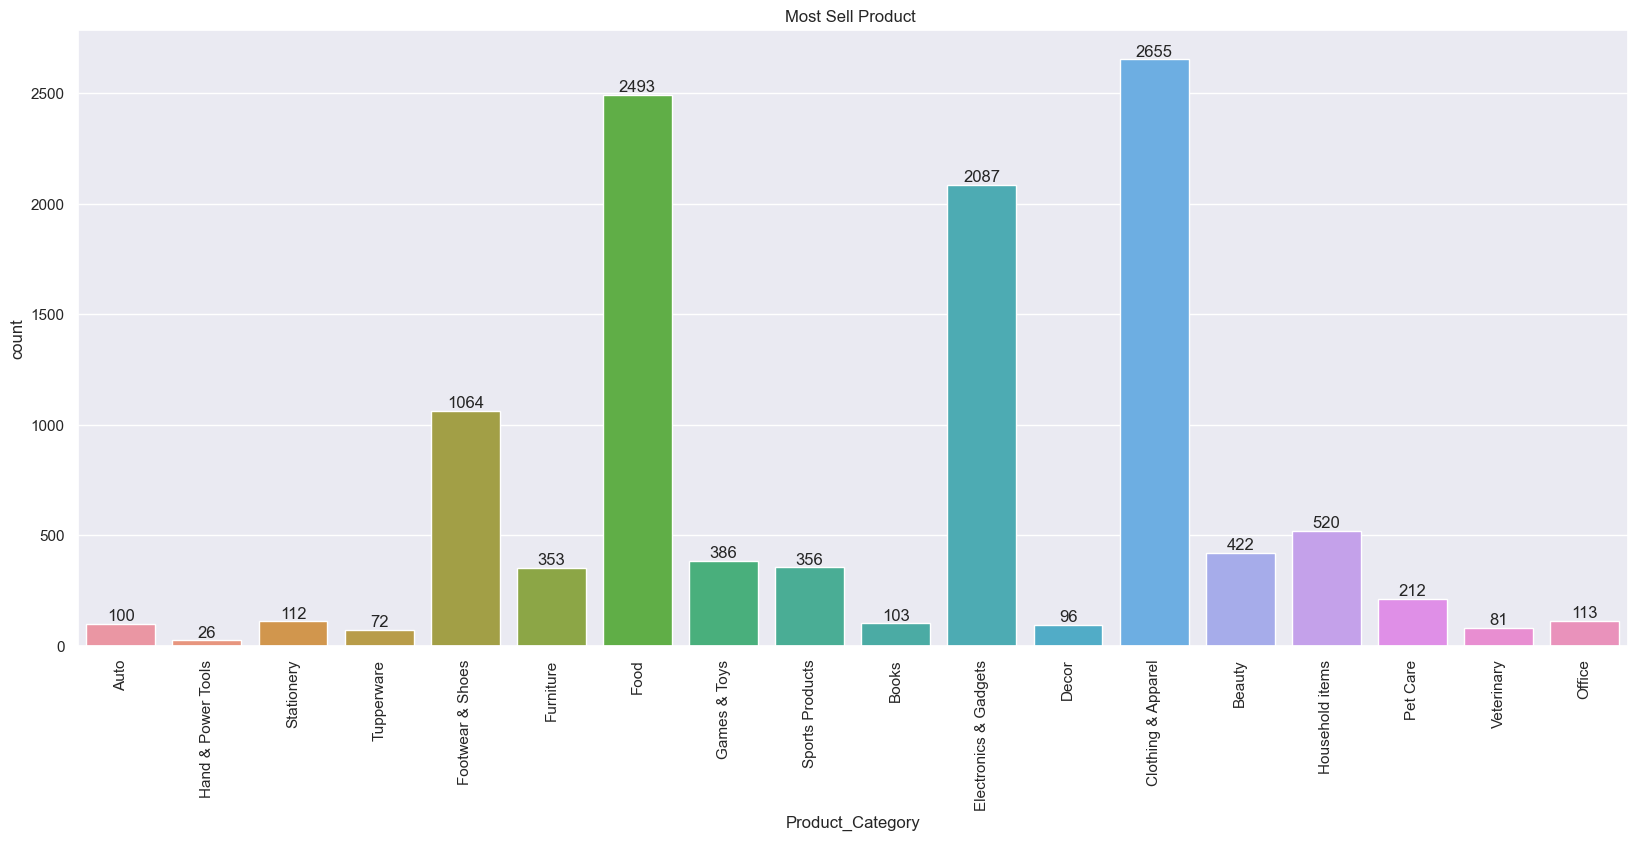

In [30]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(data = data, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Most Sell Product ')
plt.xticks(rotation=90)
plt.show()

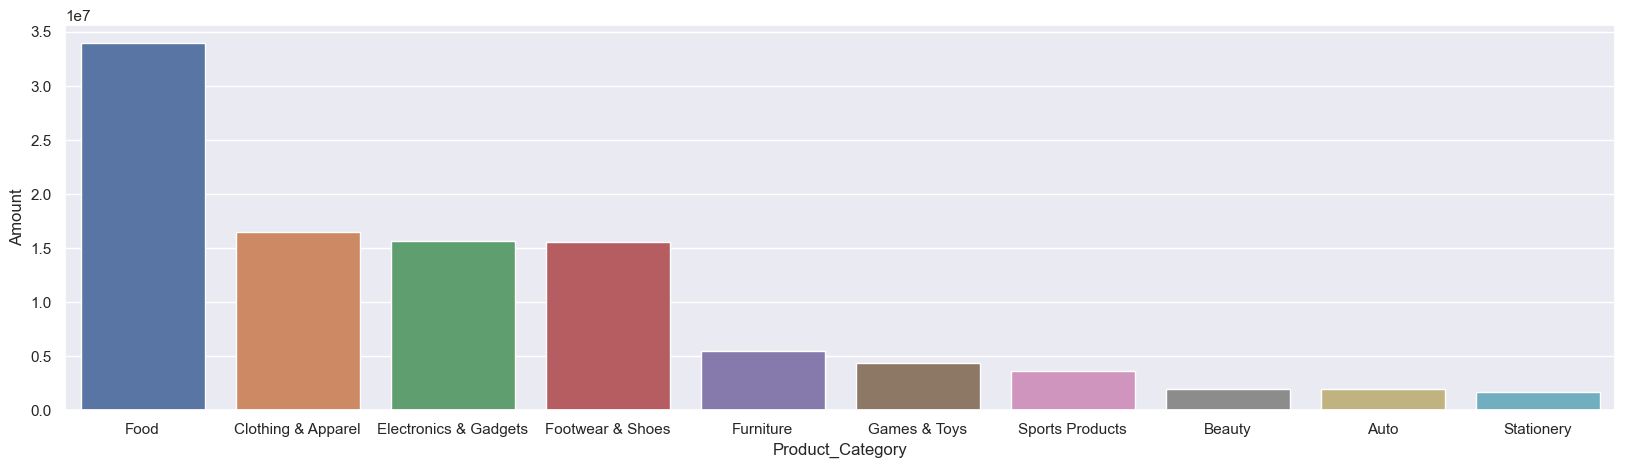

In [31]:
sales_state = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.show()


# Automated EDA

In [33]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [37]:
data=pd.DataFrame(data)

In [38]:
from ydata_profiling import ProfileReport

In [39]:
profile = ProfileReport(data,explorative=True, dark_mode=True)

In [42]:
profile.to_file(output_file="Amozon_sale.html")

/Users/nishantmehra/anaconda3/lib/python3.11/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]